In [1]:
from pathlib import Path
import pandas as pd

In [2]:
dataFolder = Path.cwd().joinpath('Data')

In [3]:
implogs = sorted(list(dataFolder.glob('imp.201310[1-2][9,0,1,2,3,4,5,6,7].txt.bz2')))

In [4]:
clklogs = sorted(list(dataFolder.glob('clk.201310[1-2][9,0,1,2,3,4,5,6,7].txt.bz2')))

In [5]:
implogs[0]

PosixPath('/mnt/New Volume/Projects/Challenges/zypmedia/Click-Through-Rate-Prediction/Data/imp.20131019.txt.bz2')

In [6]:
columnHeaders = ['bidID', 'Timestamp', 'logType', 'XYZID', 'useragent', 'ip', 'region', 'city', 'adexchange', 'domain', \
                 'url', 'anonURLID', 'adSlotID', 'width', 'height', 'visibility', \
                 'format', 'slotPrice', 'creativeId', 'bidprice', 'payPrice', 'keypageUrl', 'adverId', 'userTag']

In [7]:
features = {
    'categorical' : ['region', 'city', 'adexchange','visibility', 'format', 'adverId'],
    'numeric' : ['width', 'height', 'slotPrice', 'bidPrice', 'payPrice'],
    'drop' : ['Timestamp', 'logType', 'XYZID', 'useragent', 'ip', 'domain', 'url',\
            'anonURLID', 'adSlotID', 'creativeId', 'userTag','keypageUrl', 'bidID']
}

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
minorCount = []
totalCount = []
fileName = []
for i in range(8):
    clkDf = pd.read_csv(clklogs[i], sep='\t', names=columnHeaders, compression='bz2')
    impDf = pd.read_csv(implogs[i], sep='\t', names=columnHeaders, compression='bz2')
    impDf['click'] = 0
    impDf.loc[impDf.bidID.isin(clkDf.bidID),'click'] = 1
    minorCount.append(len(impDf[impDf.click==1]))
    totalCount.append(len(impDf))
    name = str(implogs[i]).split('/')[-1]
    name = name.split('.')[1]
    fileName.append(name)


/home/sameer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


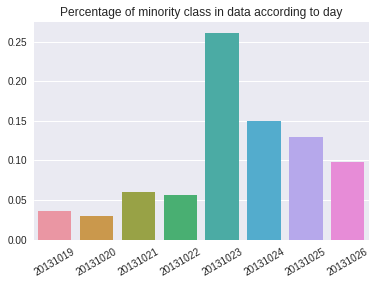

In [22]:
minorCount = np.asarray(minorCount)
totalCount = np.asarray(totalCount)

ax = sns.barplot(x = fileName, y = minorCount / totalCount * 100 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title("Percentage of minority class in data according to day")
plt.show()

In [31]:
print("Percentage of Minority Class in Training Data: {:0.4f}%".format(np.sum(minorCount[:-1])/np.sum(totalCount[:-1])*100))
print("Percentage of Minority Class in Test Data: {:0.4f}%".format(np.sum(minorCount[-1])/np.sum(totalCount[-1])*100))

Percentage of Minority Class in Training Data: 0.0873%
Percentage of Minority Class in Test Data: 0.0980%


In [ ]:
impDf = pd.read_csv(implogs[2], sep='\t', names=columnHeaders, compression='bz2')

In [ ]:
impDf.head()

In [ ]:
impDf.isna().any()

In [ ]:
clkDf = pd.read_csv(clklogs[3], sep='\t', names=columnHeaders, compression='bz2')

In [ ]:
len(clkDf)

In [ ]:
impDf['click'] = 0

In [ ]:
impDf.loc[impDf.bidID.isin(clkDf.bidID),'click'] = 1

In [ ]:
impDf['slotPrice'].unique()

In [ ]:
impDf.apply(pd.Series.nunique)

In [ ]:
bidDf = pd.read_csv(bidlogs[5], sep='\t', names=bidcolumnHeaders, compression='bz2')

In [ ]:
impDf.apply(pd.Series.nunique)# Timestamp, XYZID, useragent, ip, domain, url, adSlotID,creativeId
#numeric: width, height, slotPrice, bidPrice, payPrice

In [ ]:
impDf.adverId.unique()

In [ ]:
impDf.adexchange.unique()

In [ ]:
cat = impDf.adexchange.astype('category', categories=[1,2,3,4,5])

In [ ]:
impDf.index = impDf.bidID

In [ ]:
impDf.drop(['bidID'], axis=1, inplace=True)

In [ ]:
impDf.is

In [ ]:
impDf.width.value_counts()

In [ ]:
sns.distplot(impDf.width)

In [ ]:
sns.distplot(impDf.height)

In [ ]:
sns.distplot(impDf.slotPrice)

In [ ]:
sns.distplot(impDf.bidprice)


In [ ]:
sns.distplot(impDf.payPrice)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df = impDf[['width', 'height', 'slotPrice', 'bidprice', 'payPrice']]
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['width', 'height', 'slotPrice', 'bidprice', 'payPrice'] )

In [ ]:
df.head()

In [ ]:
df.columns = ['width', 'height', 'slotPrice', 'bidprice', 'payPrice']

In [ ]:
impDf[['width', 'height', 'slotPrice', 'bidprice', 'payPrice']] = df

In [ ]:
impDf.head()

In [ ]:
sorted(list(set(['width', 'height', 'slotPrice', 'bidprice', 'payPrice']+['1'])))

In [ ]:
import pickle
with open('5.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.visibility.unique()